In [1]:
from dataset.dataset import *
from torch.utils.data import Dataset, DataLoader
import getpass
import os
import socket
import numpy as np
from dataset.preprocess_data import *
from PIL import Image, ImageFilter
import argparse
import torch
from torch import nn
from torch import optim
from torch.optim import lr_scheduler
from models.model import generate_model
from opts import parse_opts
from torch.autograd import Variable
import time
import sys
from utils import *
import os.path as osp
import mmcv

from sklearn.decomposition import PCA
import torch.nn.functional as F
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import cv2
from mpl_toolkits.axes_grid1 import ImageGrid


In [2]:
full_path = '/scratch/tkg5kq/mmaction2/data/hmdb51/videos/hug/Calins_gratuits_a_Paris_-_Free_Hugs_France_-_version_longue_hug_u_cm_np2_le_med_9.avi' 
vid_path = 'hug/Calins_gratuits_a_Paris_-_Free_Hugs_France_-_version_longue_hug_u_cm_np2_le_med_9.avi'

In [4]:
class dummy():
    batch_size = 32
    split = 1
    annotation_path = "/scratch/tkg5kq/mmaction2/data/hmdb51/annotations/"
    frame_dir = "/scratch/tkg5kq/mmaction2/data/hmdb51/frames/"
    only_RGB = True
    dataset = 'HMDB51'
    modality = 'RGB'
    input_channels = 3
    n_classes = 400
    n_finetune_classes = 51
    output_layers = []
    model = 'resnext'
    model_depth = 101
    resnet_shortcut = 'B'
    resnext_cardinality = 32
    ft_begin_index = 4
    sample_size = 112
    sample_duration = 16
    training = True
    freeze_BN = False
    n_workers = 4
    learning_rate = 0.1
    momentum = 0.9
    dampening = 0.9
    weight_decay = 1e-3
    nesterov = False
    optimizer = 'sgd'
    lr_patience = 10
    MARS_alpha = 50
    n_epochs = 400
    begin_epoch = 1
    result_path = ''
    MARS = False
    pretrain_path = ''
    MARS_pretrain_path = ''
    MARS_resume_path = ''
    resume_path1 = ''
    resume_path2 = ''
    resume_path3 = ''
    log = 1
    checkpoint = 2
    manual_seed = 1
    random_seed = 1

opt = dummy()

In [5]:

args = dummy()
args.out_dir = './'
args.use_opencv = True

act_name = osp.basename(osp.dirname(vid_path))
out_full_path = osp.join(args.out_dir, act_name)

run_success = -1

act_name, out_full_path


('hug', './hug')

In [6]:
# Not like using denseflow,
# Use OpenCV will not make a sub directory with the video name
video_name = osp.splitext(osp.basename(vid_path))[0]
out_full_path = osp.join(out_full_path, video_name)

vr = mmcv.VideoReader(full_path)
wtsu = True
if wtsu:
    vr_tsu = np.transpose(vr, axes=[1, 0, 2, 3])
elif htsu:
    vr_tsu = np.transpose(vr, axes=[2, 1, 0, 3])

np.shape(vr), np.shape(vr_tsu)

((54, 240, 320, 3), (240, 54, 320, 3))

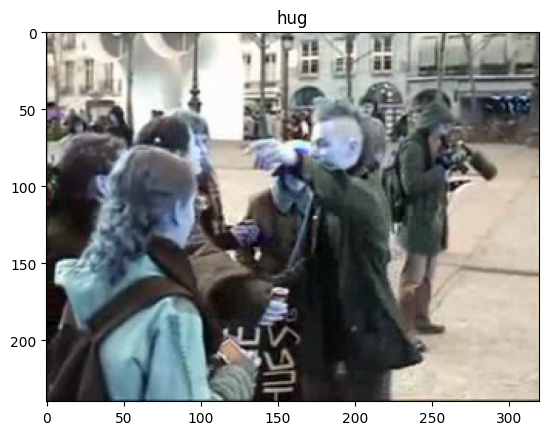

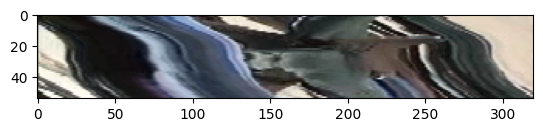

In [7]:
plt.figure()
plt.imshow(vr[0])
plt.title('hug')
plt.show()

plt.figure()
plt.imshow(vr_tsu[120])
plt.show()